<a href="https://colab.research.google.com/github/mylethidiem/data-science-artificial-intelligence-projects/blob/applied_prj_for_softmax_regression/Credit-Card-Fraud-Detection/notebooks/Card_Fraud_Detection_with_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. Download dataset**
**Note:** If you can't download using gdown due to limited number of downloads, please download it manually and upload it to your drive, then copy it from the drive to colab.
```python
from google.colab import drive

drive.mount('/content/drive')
!cp /path/to/dataset/on/your/drive .
```

In [1]:
# https://drive.google.com/file/d/1npjy1l8BwDe12KQ7MQrb7bo9jzkEWo5s/view?usp=drive_link
!gdown -q --id 1npjy1l8BwDe12KQ7MQrb7bo9jzkEWo5s

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


In [2]:
!unzip -o 'card_fraud_detection.zip'

Archive:  card_fraud_detection.zip
  inflating: creditcard.csv          


In [6]:
#Phần code chạy trên Colab
dataset_path = 'creditcard.csv'

In [ ]:
# Phần code không chạy trên Colab
!mv creditcard.csv ../data/
dataset_path = '../data/creditcard.csv'

## **1. Import libraries**

In [3]:
!pip -q install -U imbalanced-learn

[imblearn](https://imbalanced-learn.org/stable/): Offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance
- [SMOTE](https://imbalanced-learn.org/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Thuật toán SMOTE: Xử lý dữ liệu mất cân bằng (tăng số lượng mẫu thiểu số)

from sklearn.model_selection import train_test_split  # Hàm dùng để Chia tập dữ liệu (Training/Test/Validation)
from sklearn.preprocessing import StandardScaler  # Chuẩn hóa dữ liệu (Scaling) để mô hình học tốt hơn

## **2. Read dataset**

In [7]:
df = pd.read_csv(
    dataset_path
)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **3. Add bias term**

In [10]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)
print(X.shape)

(284807, 30)


In [11]:
intercept = np.ones((
    X.shape[0], 1)
)
X_b = np.concatenate(
    (intercept, X),
    axis=1
)
print(X_b.shape)
print(X_b)

(284807, 31)
[[ 1.00000000e+00  0.00000000e+00 -1.35980713e+00 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.00000000e+00  0.00000000e+00  1.19185711e+00 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00  1.00000000e+00 -1.35835406e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.00000000e+00  1.72788000e+05  1.91956501e+00 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.00000000e+00  1.72788000e+05 -2.40440050e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.00000000e+00  1.72792000e+05 -5.33412522e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


## **4. One-hot encoding label**

In [12]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

print("\n y:", y.shape, "\n", y)
print("\n y_encoded:", y_encoded.shape, "\n", y_encoded)


 y: (284807,) 
 [0 0 0 ... 0 0 0]

 y_encoded: (284807, 2) 
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## **5. Split train, val, test set**

In [13]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 199364
Number of val samples: 56962
Number of test samples: 28481


## **6. Normalization**

In [14]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

print("X_train: ", X_train)
print("X_val: ", X_val)
print("X_test: ", X_test)

X_train:  [[ 1.         -0.68101315  0.71447649 ...  0.1019486   0.07410031
  -0.29192049]
 [ 1.          1.04720051  1.0475128  ... -0.19095883 -0.09813199
  -0.27780616]
 [ 1.          1.54445364 -1.20352757 ...  0.31391593  1.12488897
  -0.34496952]
 ...
 [ 1.         -1.16327203 -0.46532359 ...  0.05909871  0.15346218
   0.26375106]
 [ 1.         -0.4253317  -1.03971015 ...  0.46421784 -0.36325231
  -0.32624398]
 [ 1.          1.49841793 -0.20953065 ...  0.07337838  0.39953201
  -0.24272082]]
X_val:  [[ 1.          1.03907161 -0.29674462 ... -0.6252699  -0.38113294
  -0.3015038 ]
 [ 1.         -0.43025959  0.3513868  ...  0.05570595  0.24223804
   0.67515171]
 [ 1.         -0.58319251 -0.43316646 ...  0.53360664  0.38706322
  -0.28698849]
 ...
 [ 1.         -0.98649993 -0.2552998  ...  0.6751164   0.32389007
  -0.33506543]
 [ 1.          1.61047467  0.97182258 ... -0.03093271 -0.03167614
  -0.13618169]
 [ 1.          0.49104441  0.07535021 ...  0.52509912  0.86336534
  -0.23438054]

## **6.5. Handle Imbalanced Data with SMOTE**

In [15]:
# Resample training data to balance classes
smote = SMOTE(random_state=random_state, sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train[:, 1:], np.argmax(y_train, axis=1))

# Re-add intercept term
intercept_balanced = np.ones((X_train_balanced.shape[0], 1))
X_train = np.concatenate((intercept_balanced, X_train_balanced), axis=1)

# Re-encode labels to one-hot
y_train = np.array([np.zeros(n_classes) for _ in range(y_train_balanced.shape[0])])
y_train[np.arange(y_train_balanced.shape[0]), y_train_balanced] = 1

# Verify new distribution
print(f'Balanced training samples: {X_train.shape[0]}')
print(f'Class distribution: {np.bincount(y_train_balanced)}')

Balanced training samples: 398002
Class distribution: [199001 199001]


## **7. Define essential functions**

### **7.1. Softmax Function**

In [16]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

### **7.2. Hypothesis function**

In [17]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

### **7.3. Cross-entropy loss function**

In [18]:
def compute_loss(y_hat, y):
    n = y.size

    return (-1 / n) * np.sum(y * np.log(y_hat))

### **7.4. Gradient function**

In [19]:
def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y)) / n

### **7.5. Update weights function**

In [20]:
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

### **7.6. Accuracy function**

In [21]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

    return acc

## **8. Training**

In [22]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)

In [23]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.189	Validation loss: 0.266

EPOCH 2:	Training loss: 0.133	Validation loss: 0.178

EPOCH 3:	Training loss: 0.106	Validation loss: 0.134

EPOCH 4:	Training loss: 0.092	Validation loss: 0.110

EPOCH 5:	Training loss: 0.084	Validation loss: 0.096

EPOCH 6:	Training loss: 0.079	Validation loss: 0.088

EPOCH 7:	Training loss: 0.076	Validation loss: 0.082

EPOCH 8:	Training loss: 0.074	Validation loss: 0.078

EPOCH 9:	Training loss: 0.073	Validation loss: 0.075

EPOCH 10:	Training loss: 0.071	Validation loss: 0.072

EPOCH 11:	Training loss: 0.071	Validation loss: 0.071

EPOCH 12:	Training loss: 0.070	Validation loss: 0.069

EPOCH 13:	Training loss: 0.069	Validation loss: 0.068

EPOCH 14:	Training loss: 0.069	Validation loss: 0.067

EPOCH 15:	Training loss: 0.068	Validation loss: 0.066

EPOCH 16:	Training loss: 0.068	Validation loss: 0.065

EPOCH 17:	Training loss: 0.068	Validation loss: 0.064

EPOCH 18:	Training loss: 0.067	Validation loss: 0.064

EPOCH 19:	Training

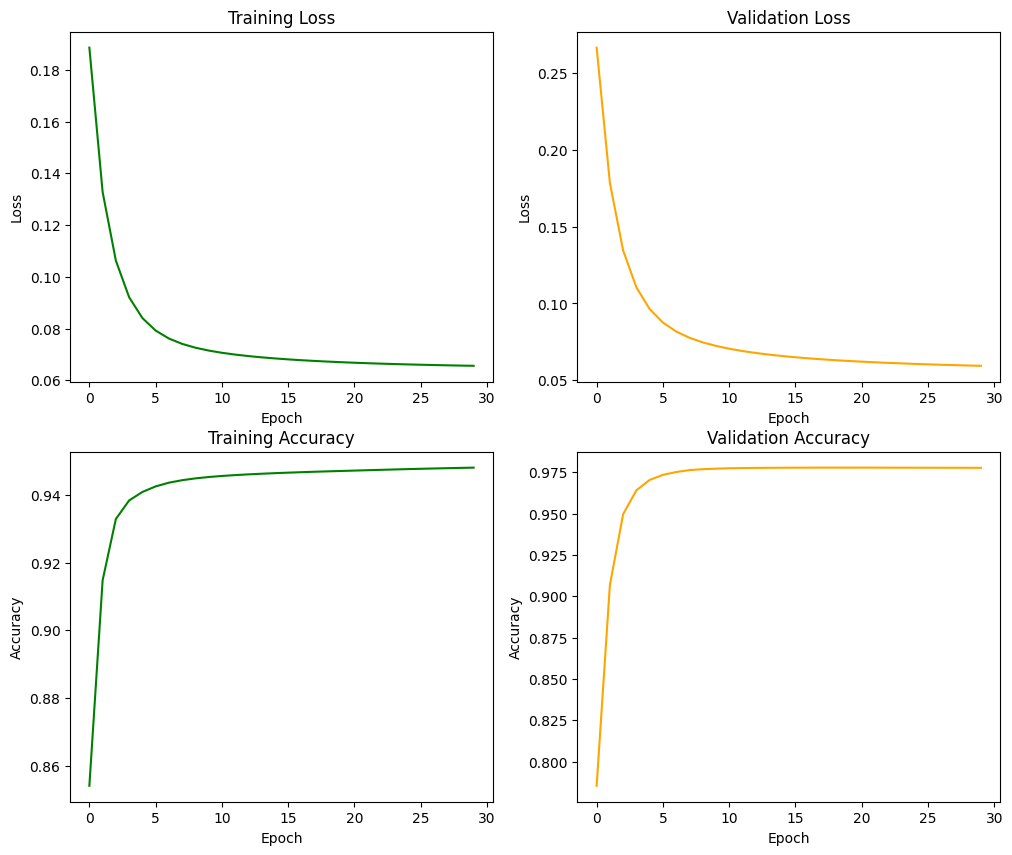

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, color='green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, color='green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## **9. Evaluation**

In [25]:
# Val set
val_set_acc = compute_accuracy(X_val, y_val, theta)
print('Evaluation on validation set:')
print(f'Accuracy: {val_set_acc}')

Evaluation on validation set:
Accuracy: 0.9711386538394017


In [26]:
# Test set
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on test set:')
print(f'Accuracy: {test_set_acc}')

Evaluation on test set:
Accuracy: 0.9721568765141674
